### Project information and objectives

Data Set Information:

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.


Attribute Information:

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,

- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,

- Relative Humidity (RH) in the range 25.56% to 100.16%

- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

More info available at https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

### Data preprocessing

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.2.0'

In [3]:
dataset = pd.read_excel("Dataset/Folds5x2_pp.xlsx")
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
dataset.isna().any() # verify our dataset is complete

AT    False
V     False
AP    False
RH    False
PE    False
dtype: bool

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

### Model Preparation

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
from keras.layers import Dense
from keras.models import Sequential
ann = Sequential()
# Add input and hidden layers
ann.add(Dense(units = 6, activation = "relu"))
ann.add(Dense(units = 6, activation = "relu"))

# Add output layer
ann.add(Dense(units = 1))

# Compile
ann.compile(optimizer = "adam", loss = "mse")

### Model Training

In [29]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100,
       validation_split = 0.2, verbose = 1)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

168/168 [==============================] - 0s 3ms/step - loss: 23301.9863 - val_loss: 473.1865
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 407.2494 - val_loss: 388.5759
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 389.3784 - val_loss: 374.7609
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 373.8816 - val_loss: 362.0098
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 356.5461 - 

168/168 [==============================] - 0s 2ms/step - loss: 26.6148 - val_loss: 25.3685
Epoch 73/100
168/168 [==============================] - 0s 2ms/step - loss: 26.5113 - val_loss: 25.1247
Epoch 74/100
168/168 [==============================] - 0s 2ms/step - loss: 27.1261 - val_loss: 25.0908
Epoch 75/100
168/168 [==============================] - 0s 2ms/step - loss: 28.8393 - val_loss: 25.9256
Epoch 76/100
168/168 [==============================] - 0s 2ms/step - loss: 26.2737 - val_loss: 25.3235
Epoch 77/100
168/168 [==============================] - 0s 2ms/step - loss: 26.5101 - val_loss: 25.3094
Epoch 78/100
168/168 [==============================] - 0s 2ms/step - loss: 26.3398 - val_loss: 25.6152
Epoch 79/100
168/168 [==============================] - 0s 2ms/step - loss: 26.4767 - val_loss: 24.9581
Epoch 80/100
168/168 [==============================] - 0s 2ms/step - loss: 26.4781 - val_loss: 25.3232
Epoch 81/100
168/168 [==============================] - 0s 2ms/step - loss: 2

In [31]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[431.97 431.23]
 [463.3  460.01]
 [466.88 461.14]
 ...
 [435.17 426.86]
 [436.31 433.4 ]
 [439.65 441.94]]


Epoch 1/100
168/168 [==============================] - 0s 2ms/step - loss: 26.5346 - val_loss: 24.8692
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 26.5440 - val_loss: 24.8707
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 26.6708 - val_loss: 25.4590
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 26.2901 - val_loss: 24.8853
Epoch 5/100
168/168 [==============================] - 0s 3ms/step - loss: 26.5668 - val_loss: 25.2670
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 27.0153 - val_loss: 25.8767
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 26.8365 - val_loss: 25.2468
Epoch 8/100
168/168 [==============================] - 0s 2ms/step - loss: 26.4771 - val_loss: 25.0030
Epoch 9/100
168/168 [==============================] - 0s 2ms/step - loss: 26.7475 - val_loss: 25.6493
Epoch 10/100
168/168 [==============================] - 0s 2ms/step - los

Epoch 80/100
168/168 [==============================] - 0s 3ms/step - loss: 26.1887 - val_loss: 25.9911
Epoch 81/100
168/168 [==============================] - 0s 2ms/step - loss: 26.6885 - val_loss: 27.6329
Epoch 82/100
168/168 [==============================] - 0s 2ms/step - loss: 26.6243 - val_loss: 24.9942
Epoch 83/100
168/168 [==============================] - 0s 2ms/step - loss: 26.4156 - val_loss: 25.1751
Epoch 84/100
168/168 [==============================] - 0s 2ms/step - loss: 26.6435 - val_loss: 24.8820
Epoch 85/100
168/168 [==============================] - 0s 2ms/step - loss: 26.7965 - val_loss: 25.3404
Epoch 86/100
168/168 [==============================] - 0s 2ms/step - loss: 26.5412 - val_loss: 26.5145
Epoch 87/100
168/168 [==============================] - 0s 2ms/step - loss: 26.5791 - val_loss: 25.1287
Epoch 88/100
168/168 [==============================] - 0s 2ms/step - loss: 26.3901 - val_loss: 24.8972
Epoch 89/100
168/168 [==============================] - 0s 2ms/s

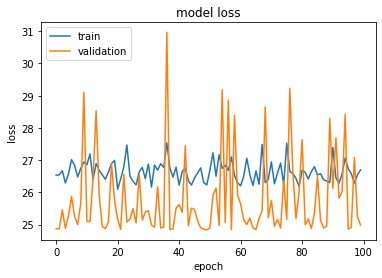

In [32]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100,
       validation_split = 0.2, verbose = 1)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In a truly strong model, we expect training and validation loss to decrease exponentially as the number of epochs increases.

### Improving our model

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
y = np.reshape(y, (-1, 1))
sc_X.fit(X)
X_scale = sc_X.transform(X)
sc_y.fit(y)
y_scale = sc_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size = 0.3, random_state = 0)

Epoch 1/100
168/168 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 8/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 9/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/100
168/168 [==============================] - 0s 2ms/step - loss: 0.0033 - val_lo

168/168 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 82/100
168/168 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 83/100
168/168 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 84/100
168/168 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 85/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 86/100
168/168 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 87/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 88/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 89/100
168/168 [==============================] - 1s 5ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 90/100
168/168 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 

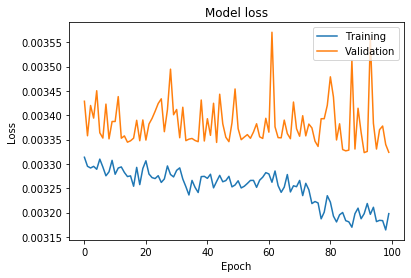

In [35]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100,
       validation_split = 0.2, verbose = 1)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
n_folds = 10
loss